In [42]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [43]:
mnist = tf.keras.datasets.mnist

In [56]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [45]:
x_train = x_train/255.0
x_test = x_test/255.0

In [57]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [58]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (28, 28,1)),
    tf.keras.layers.Conv2D(32, (5,5), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(255, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [59]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 255)                 │         799,935 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           2,560 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 821,823 (3.14 MB)

 Trainable params: 821,823 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

None


In [60]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau()

In [61]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test  = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [62]:
history = model.fit(x_train, y_train, epochs=15, batch_size=112, validation_split=0.1, callbacks=[reduce_lr])

Epoch 1/15
483/483 ━━━━━━━━━━━━━━━━━━━━ 40s 80ms/step - accuracy: 0.8471 - loss: 3.7637 - val_accuracy: 0.9815 - val_loss: 0.0735 - learning_rate: 0.0010
Epoch 2/15
483/483 ━━━━━━━━━━━━━━━━━━━━ 42s 87ms/step - accuracy: 0.9771 - loss: 0.0788 - val_accuracy: 0.9827 - val_loss: 0.0681 - learning_rate: 0.0010
Epoch 3/15
483/483 ━━━━━━━━━━━━━━━━━━━━ 38s 80ms/step - accuracy: 0.9852 - loss: 0.0539 - val_accuracy: 0.9850 - val_loss: 0.0534 - learning_rate: 0.0010
Epoch 4/15
483/483 ━━━━━━━━━━━━━━━━━━━━ 37s 77ms/step - accuracy: 0.9875 - loss: 0.0417 - val_accuracy: 0.9872 - val_loss: 0.0618 - learning_rate: 0.0010
Epoch 5/15
483/483 ━━━━━━━━━━━━━━━━━━━━ 37s 76ms/step - accuracy: 0.9902 - loss: 0.0373 - val_accuracy: 0.9897 - val_loss: 0.0473 - learning_rate: 0.0010
Epoch 6/15
483/483 ━━━━━━━━━━━━━━━━━━━━ 37s 77ms/step - accuracy: 0.9904 - loss: 0.0326 - val_accuracy: 0.9902 - val_loss: 0.0658 - learning_rate: 0.0010
Epoch 7/15
483/483 ━━━━━━━━━━━━━━━━━━━━ 37s 77ms/step - accuracy: 0.9920 - l

In [98]:
model.save("mnist_cnn_model.keras")
print("Model saved as mnist_cnn_model.keras")

Model saved as mnist_cnn_model.keras


In [99]:
saved_model = tf.keras.models.load_model('mnist_cnn_model.keras')

In [100]:
test_loss, test_acc = saved_model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9874 - loss: 0.1068
Test accuracy: 98.93%


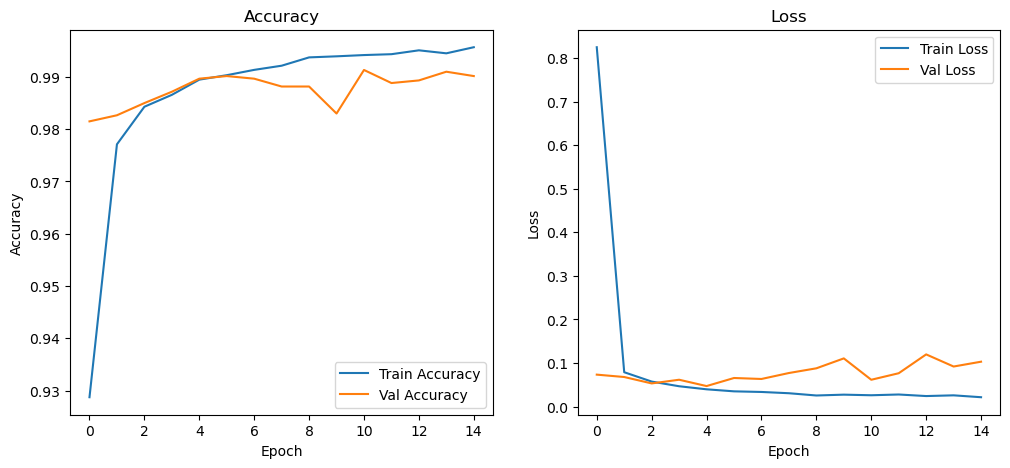

In [101]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


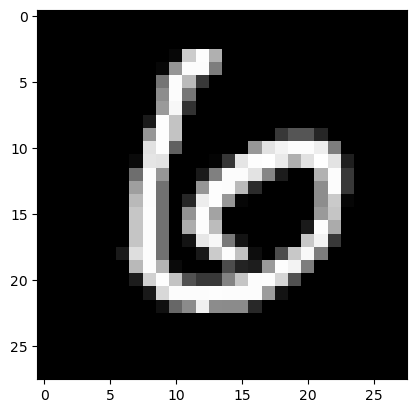

Actual label: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
6


In [102]:
plt.imshow(x_test[11],  cmap='gray')
plt.show()
print("Actual label:", np.argmax(y_test[11]))
res = saved_model.predict(x_test[11].reshape(1, 28, 28))
index = np.argmax(res)
print(index)

In [103]:
images = {}

for i in range(len(x_test)):
    if np.argmax(y_test[i]) not in images:
        images[np.argmax(y_test[i])] = x_test[i]
    if len(images) == 10:
        break
print(images.keys())

dict_keys([7, 2, 1, 0, 4, 9, 5, 6, 3, 8])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


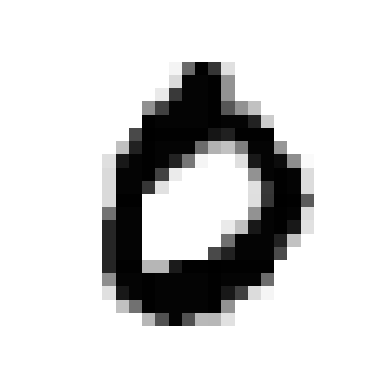

The number is probably a 0
The actual number is a 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


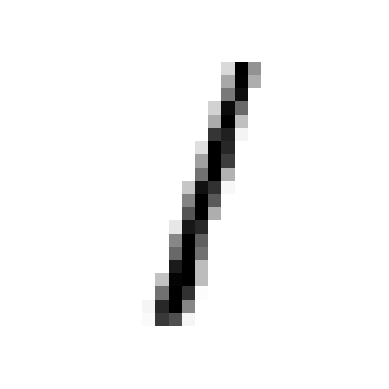

The number is probably a 1
The actual number is a 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


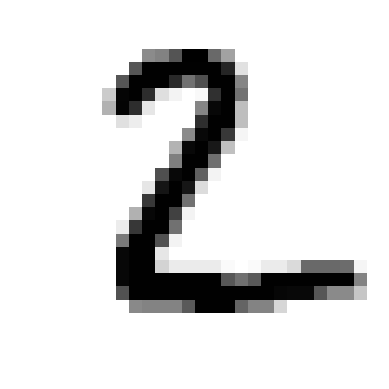

The number is probably a 2
The actual number is a 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


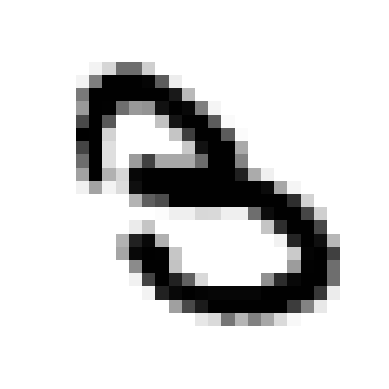

The number is probably a 3
The actual number is a 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


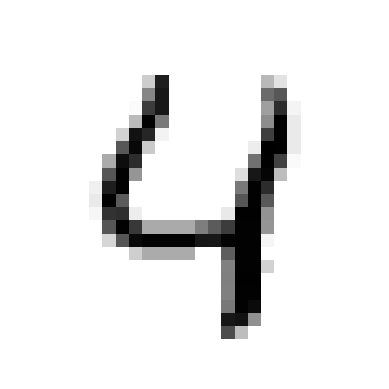

The number is probably a 4
The actual number is a 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


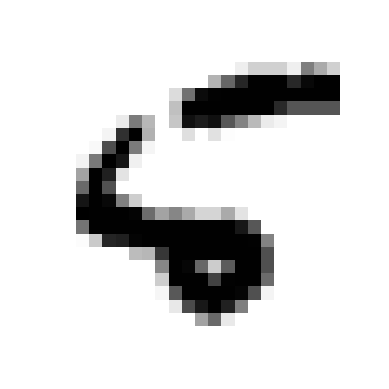

The number is probably a 5
The actual number is a 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


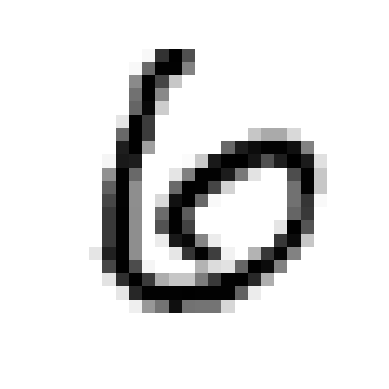

The number is probably a 6
The actual number is a 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


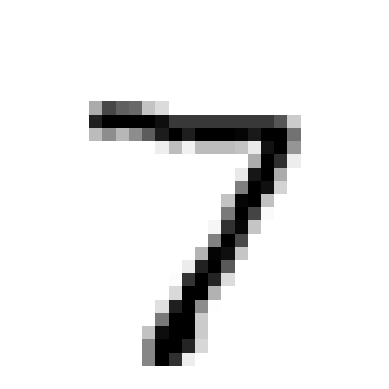

The number is probably a 7
The actual number is a 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


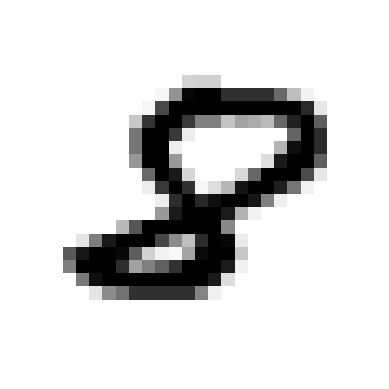

The number is probably a 8
The actual number is a 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


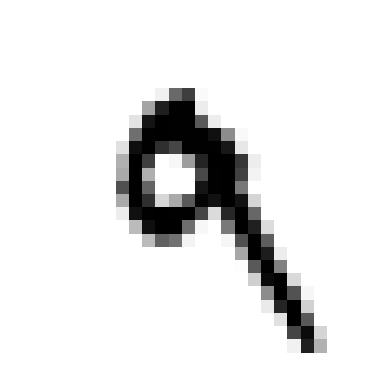

The number is probably a 9
The actual number is a 9


In [104]:
for i in range(10):
    img = images[i]
    pred = saved_model.predict(img.reshape(1,28,28))
        
    # Show image using matplotlib
    plt.imshow(img, cmap=plt.cm.binary)
    plt.axis('off')
    plt.show()

    print(f"The number is probably a {np.argmax(pred)}")
    
    print(f"The actual number is a {i}")